In [1]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 815.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for hnswlib: filename=hnswlib-0

![Screenshot 2025-01-04 231707.png](<attachment:Screenshot 2025-01-04 231707.png>)
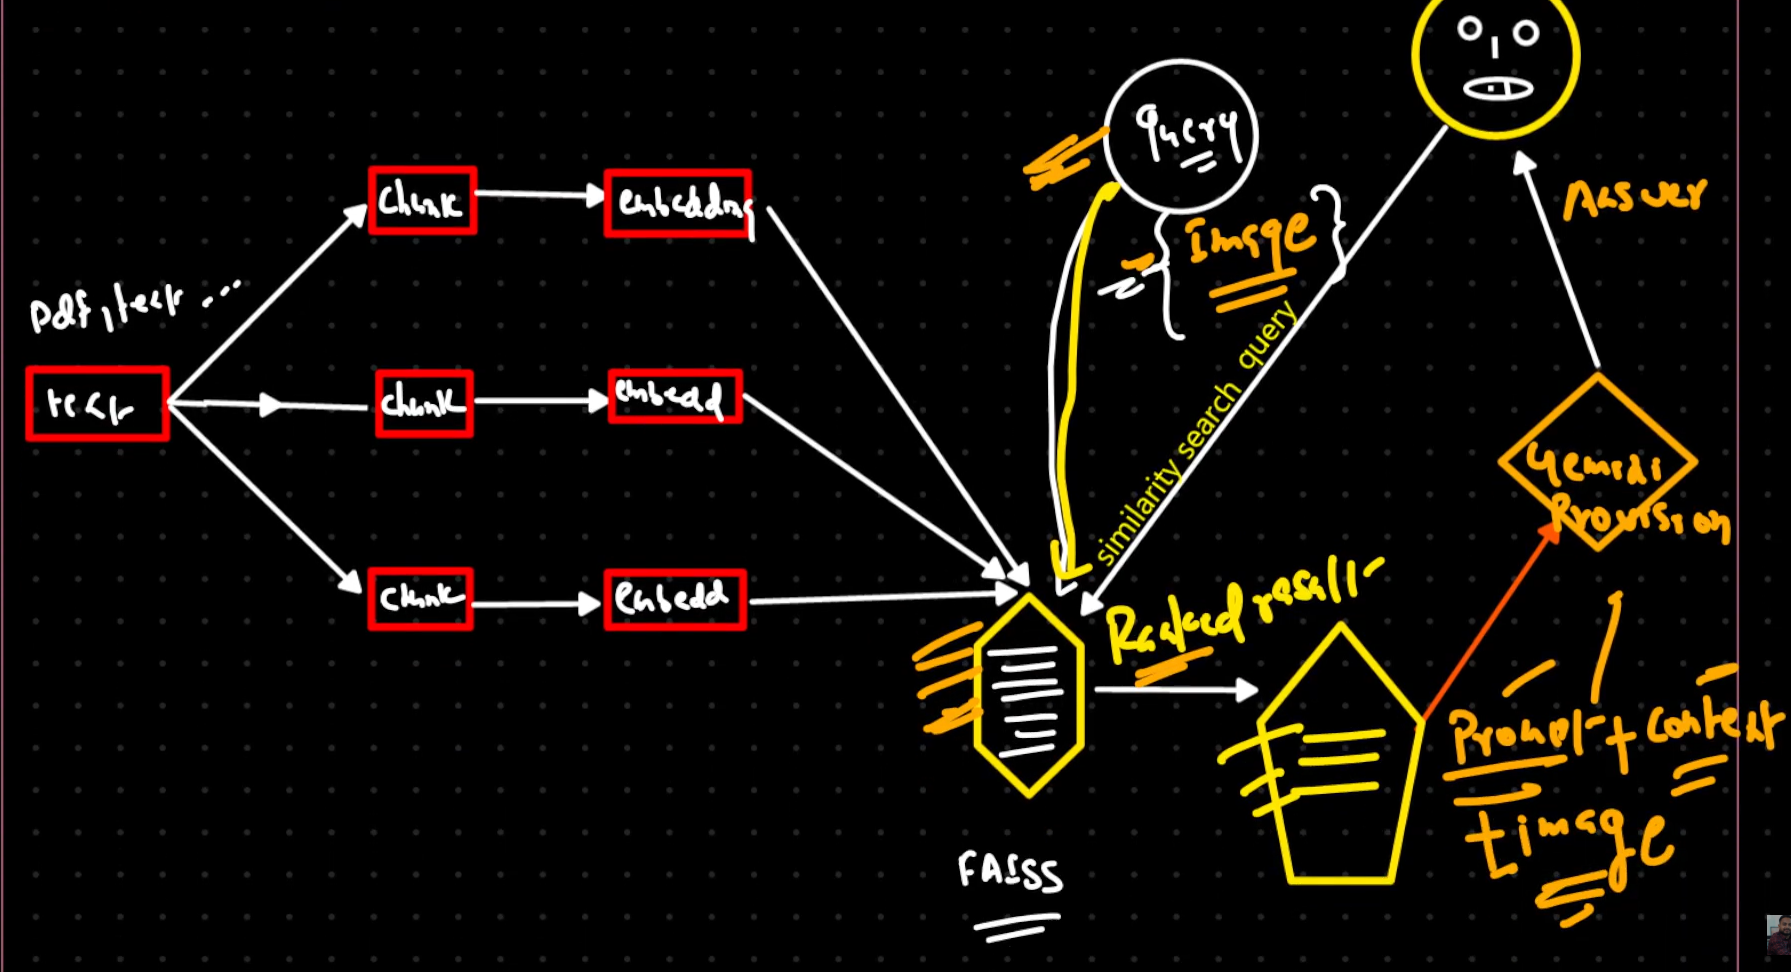

In [2]:
import os
import requests
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage

In [6]:
from langchain.vectorstores import DocArrayInMemorySearch

In [7]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [8]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [9]:
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [10]:
from langchain_text_splitters import CharacterTextSplitter

In [11]:
from langchain_community.vectorstores import FAISS

In [12]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [13]:
def load_model(model_name):
  if model_name=="gemini-pro":
    llm = ChatGoogleGenerativeAI(model="gemini-pro")
  else:
    llm=ChatGoogleGenerativeAI(model="gemini-pro-vision")

  return llm


In [14]:
model_text=load_model("gemini-pro")

In [18]:
model_text.invoke("please come up with the best funny line.").content

'"Why did the scarecrow win an award? Because he was outstanding in his field!"'

In [19]:
model_text(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?")
    ]
).content

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'Yes'

In [20]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image



In [21]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

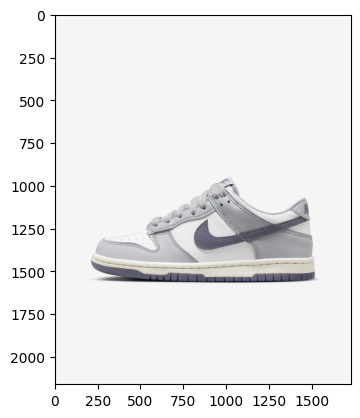

In [22]:
plt.imshow(image)
plt.show()

In [23]:
vision_model=load_model("gemini-pro-vision")

In [29]:
prompt="give me summary of this image in 5 words"

In [30]:
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", "image_url": image
        }
    ]
)

In [31]:
print(vision_model.invoke([message]).content)

 A gray and white Nike Dunk Low.


In [32]:
loader = TextLoader("/content/Nike_Air_Max_Plus_Sneakers.txt")
print(loader.load()[0].page_content)

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31

In [36]:
text=loader.load()[0].page_content

In [37]:
def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [38]:
docs = get_text_chunks_langchain(text)

In [39]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [40]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings)   

In [41]:
retriever=vectorstore.as_retriever()

In [42]:
retriever.invoke("Nike slide/sandal.")

[Document(page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(page_content='Nike Dunk Low Retro sneakers.\nHere are some more details about the Nike Dunk Low Retro:\nStyle: Low-top\nRelease date: October 31, 2020\nStyle code: DD1391-100\nOriginal retail price: $100 USD\nThe Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It 

In [43]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [44]:
llm_vision = load_model("gemini-pro-vision")

In [47]:
llm_text = load_model("gemini-pro")

In [50]:
template = """
```
{context}
```

{query}


Provide brief information and store location.
"""

In [51]:
prompt = ChatPromptTemplate.from_template(template)

In [52]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()} # Pass-the retriever data along with input data(query)
    | prompt
    | llm_text
    | StrOutputParser()
)

In [53]:
result = rag_chain.invoke("can you give me a detail of nike sandal?")

In [54]:
display(Markdown(result))

**Nike Benassi Solarsoft Sandal**

**Features:**

* Soft, one-piece upper for comfort and support
* Phylon midsole for cushioning and support
* Rubber outsole for traction and durability
* Swoosh logo on the strap
* Available in a variety of colors

**Store Location:** "Bhaktapur, Nepal"

In [55]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7d2b6e953e80>),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'))])
| ChatGoogleGenerativeAI(model='gemini-pro', client=genai.GenerativeModel(
      model_name='models/gemini-pro',
      generation_config={},
      safety_settings={},
      tools=None,
      system_instruction=None,
  ))
| StrOutputParser()

In [56]:
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [ ]:
full_chain

In [57]:
url_1 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"

In [58]:
image = get_image(url_1, "nike3", "png")

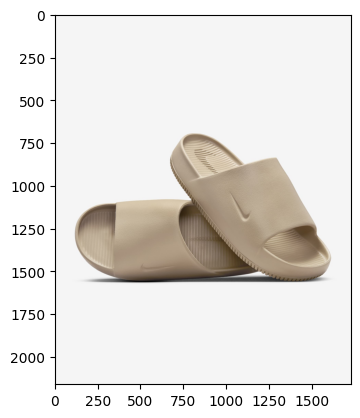

In [59]:
plt.imshow(image)
plt.show()

In [63]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given sandle image Brand and model.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)


In [64]:
result = full_chain.invoke([message])

In [65]:
display(Markdown(result))

**Nike Offcourt Slide Sandal**

* Soft, durable foam upper
* Contoured footbed for arch support and cushioning
* Rubber outsole for traction and durability
* Available in a variety of colors
* **Store Location:** Bhaktapur, Nepal

In [ ]:
# Describe the origins of the Nike Air Max Plus, including its release year, the inspiration behind its design, the role of the designer, and the technology that set it apart from previous Air Max models.

# Explain the Tuned Air technology used in the Nike Air Max Plus and compare it to earlier Nike Air cushioning systems. How do design elements like TPU overlays and flex grooves enhance performance and aesthetics?

# How did the Nike Air Max Plus gain popularity in different regions, particularly in Europe and the UK? Discuss its association with subcultures, its nickname in Australia, and the marketing strategies that contributed to its cultural significance.

# How has Nike kept the Air Max Plus relevant over the years through modern updates, special editions, and collaborations? Highlight one example of a notable collaboration and discuss its appeal to collectors and new generations.

# Why is the Nike Air Max Plus considered both a performance shoe and a lifestyle sneaker? Discuss how its natural inspirations and innovative design contribute to its enduring popularity and influence on modern sneaker trends.